<a href="https://colab.research.google.com/github/JoaoMateus1010/MachineLearning/blob/master/works/Lista_07/Lista07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 07 - Wisconsin Diagnostic Breast Cancer (WDBC)
### **Nome: João Mateus Dias do Carmo**
### **Curso:** Engenharia de Computação
#### **Matrícula:** 390187

#### *Importações*

In [0]:
import numpy as np
import pandas as pd
import sklearn as skl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#### *Lendo Dataframe*

In [0]:
Dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)

### *Analisando os Dados*

In [87]:
Dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [89]:
Dataframe.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [90]:
Dataframe.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.075,0.1,0.073,0.097,-0.013,9.6e-05,0.05,0.044,-0.022,-0.053,0.14,-0.0075,0.14,0.18,0.097,0.034,0.055,0.079,-0.017,0.026,0.082,0.065,0.08,0.11,0.01,-0.003,0.023,0.035,-0.044,-0.03
2,0.075,1,0.32,1,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.097,0.67,0.74,-0.22,0.21,0.19,0.38,-0.1,-0.043,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
3,0.1,0.32,1,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.28,0.39,0.28,0.26,0.0066,0.19,0.14,0.16,0.0091,0.054,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
4,0.073,1,0.33,1,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.087,0.69,0.74,-0.2,0.25,0.23,0.41,-0.082,-0.0055,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
5,0.097,0.99,0.32,0.99,1,0.18,0.5,0.69,0.82,0.15,-0.28,0.73,-0.066,0.73,0.8,-0.17,0.21,0.21,0.37,-0.072,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
6,-0.013,0.17,-0.023,0.21,0.18,1,0.66,0.52,0.55,0.56,0.58,0.3,0.068,0.3,0.25,0.33,0.32,0.25,0.38,0.2,0.28,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
7,9.6e-05,0.51,0.24,0.56,0.5,0.66,1,0.88,0.83,0.6,0.57,0.5,0.046,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
8,0.05,0.68,0.3,0.72,0.69,0.52,0.88,1,0.92,0.5,0.34,0.63,0.076,0.66,0.62,0.099,0.67,0.69,0.68,0.18,0.45,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
9,0.044,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1,0.46,0.17,0.7,0.021,0.71,0.69,0.028,0.49,0.44,0.62,0.095,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
10,-0.022,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1,0.48,0.3,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44


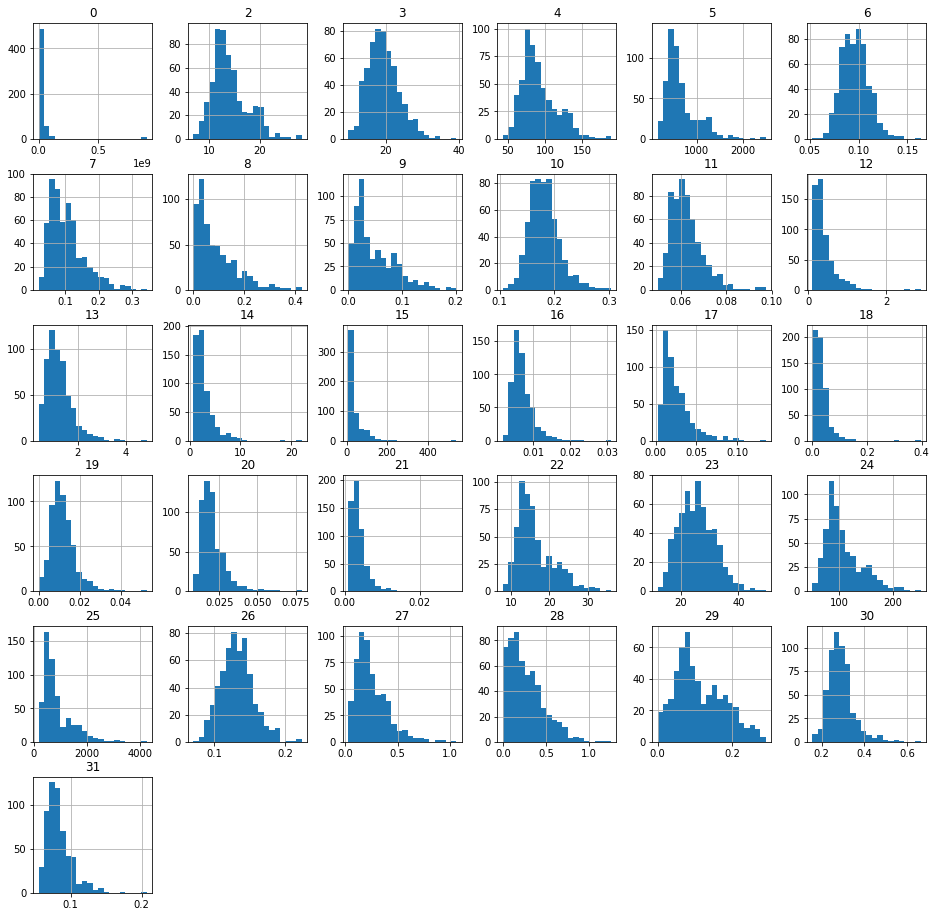

In [91]:
Dataframe.hist(figsize=(16,16),bins=20);

### *Separação de dados de treino e teste (80% para treino, 20% para test)*
#### *Usando a função do Sklean train_test_slipt*

**Separação das Labels**

In [0]:
Y = Dataframe[1].values

**Separação das Features**

In [0]:
X = Dataframe.drop(1,axis=1)

**Separação dos dados de treino e teste usando o train_test_slipt**

In [0]:
(x_treino,x_teste,y_treino,y_teste) = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [95]:
(x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape)

((455, 31), (114, 31), (455,), (114,))

### *Standartização das Features*

In [0]:
std = StandardScaler()

In [97]:
std.fit(x_treino)
x_treino=std.transform(x_treino);

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [98]:
std.fit(x_teste)
x_teste=std.transform(x_teste);

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### *Treinando Modelo usando Perceptron*

In [0]:
models={}
models["PNome"]=Perceptron(alpha=0.0001, random_state=0,tol=1e-2)
models["PL1"]=Perceptron(penalty="l1",alpha=0.0001, random_state=0,tol=1e-2)
models["PL2"]=Perceptron(penalty="l2",alpha=0.0001, random_state=0,tol=1e-2)
models["PEN"]=Perceptron(penalty="elasticnet",alpha=0.0001, random_state=0,tol=1e-2)

In [0]:
accuracy=list()

In [0]:
for key in models:
  models[key].fit(x_treino,y_treino)
  accuracy.append(models[key].score(x_teste,y_teste));

In [102]:
accuracy

[0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193]

### *Usando cross_val_score para fazer a cross validação*

In [103]:
for key in models:
  accuracyCross = (cross_val_score(models[key],X,Y,cv=3))
  print(models[key].score(x_teste,y_teste))

0.9649122807017544
0.9473684210526315
0.956140350877193
0.956140350877193


In [104]:
accuracyCross

array([0.62631579, 0.37368421, 0.62962963])

### *Usando validação cruzada estratificada (StratifiedKFold) com randomização dos dados*

In [0]:
sfkf = StratifiedKFold(n_splits=3,shuffle=True,random_state=5)

In [0]:
for key in models:
  accuracyCrossStd=(cross_val_score(models[key],X,Y,cv=sfkf))

In [107]:
accuracyCrossStd

array([0.62631579, 0.37368421, 0.37037037])

### *Avaliando acurácias encontradas*
**Seguindo a sequência**

1.   Sem Penalidade
2.   L1
3.   L2
4.   ElasticNet


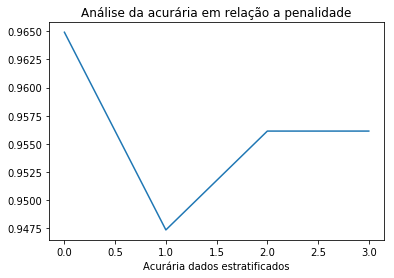

In [108]:
figureXY = plt.subplot()
plt.xlabel("Acurária dados estratificados")
plt.title("Análise da acurária em relação a penalidade")
figureXY.plot(accuracy)
plt.show()

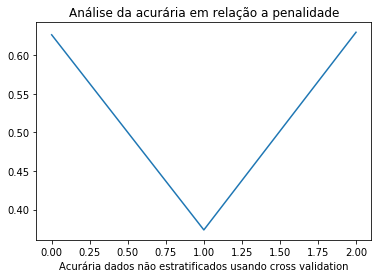

In [109]:
figureXY = plt.subplot()
plt.xlabel("Acurária dados não estratificados usando cross validation")
plt.title("Análise da acurária em relação a penalidade")
figureXY.plot(accuracyCross)
plt.show()

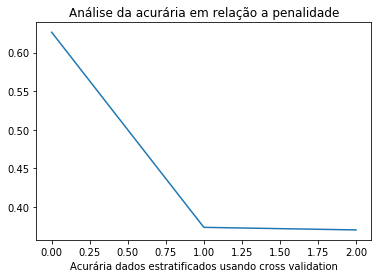

In [110]:
figureXY = plt.subplot()
plt.xlabel("Acurária dados estratificados usando cross validation")
plt.title("Análise da acurária em relação a penalidade")
figureXY.plot(accuracyCrossStd)
plt.show()